In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import det, inv
from matplotlib import pyplot as plt

## Generating random data

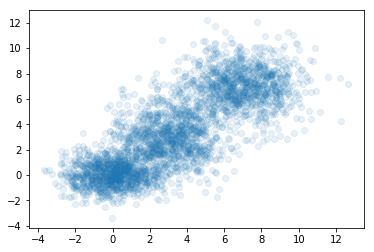

In [2]:
np.random.seed(642)
d = 4
mu1 = [0]*d
mu2 = [3]*d
mu3 = [7]*d
mu = [mu1, mu2, mu3]

sigma1 = np.diag(np.random.uniform(low=0, high=3, size=d))
sigma2 = np.diag(np.random.uniform(low=0, high=3, size=d))
sigma3 = np.diag(np.random.uniform(low=0, high=3, size=d))
sigma = [sigma1, sigma2, sigma3]

X = np.empty(shape=(0,d))

for i, m in enumerate(mu):
    S = np.random.multivariate_normal(mean = m, cov = sigma[i], size=1000)
    X = np.concatenate([X,S])
plt.scatter(X[:,0],X[:,1], alpha=0.1)


## EM-algorithm initialzation

In [3]:
def gaussian_density(x,mu,sigma):
    p = np.exp( - 0.5 * np.dot( np.dot((x-mu), inv(sigma)), (x-mu) ) )/np.sqrt(det(sigma)) 
    return p
    
k = 3
n = X.shape[0]

alphas = [1/k]*k
# w = np.full(shape=(n,k), fill_value=1/(k))

max_iter = 20
mu_hat = []
sigma_hat = [np.diag(np.array([1]*d))]*k

np.random.seed(642)
for _ in np.arange(0,k):
    j = np.random.randint(low=0,high=n,size=1)[0]
    mu_j = list(X[j])
    mu_hat.append(mu_j)


    

## EM-algorithm

In [4]:
logL = []

for iter in np.arange(0, max_iter):
    # weights
    dens = []
    for j in np.arange(0,k):
        dens.append(list(np.apply_along_axis(gaussian_density, 1, X, mu=mu_hat[j], sigma=sigma_hat[j])))
    dens = np.transpose(np.array(dens))
    dens = np.multiply(dens, alphas)
    logL.append(np.sum(np.log(np.apply_along_axis(np.sum, 1, dens))))
    inv_sums = 1/np.apply_along_axis(np.sum, 1, dens)
    inv_sums.shape = (inv_sums.shape[0],1)
    w = np.multiply(dens, inv_sums)
    # alphas
    alphas = np.apply_along_axis(np.sum, 0, w)
    # N_k
    N_k = np.apply_along_axis(np.sum, 0, w)
    
    # mu-s
    mu_hat = []    
    for j in np.arange(0,k):
        w_j = w[:,j]
        w_j.shape = (w_j.shape[0],1)
        mu_j = list(np.apply_along_axis(np.sum, 0 , X * w_j) / N_k[j])
        mu_hat.append(mu_j)
    
    # sigmas-s
    sigma_hat = [np.zeros(shape=sigma_hat[0].shape)]*k
    for j in np.arange(0,k):
        for i in np.arange(0,n):
            c1 = X[i] - mu_hat[j]
            c1.shape = (c1.shape[0],1)
            c2 = np.transpose(c1)
            sigma_hat[j] = sigma_hat[j] + w[i,j]*np.dot(c1,c2)
        sigma_hat[j] = sigma_hat[j] / N_k[j]
    

15012.631570340025

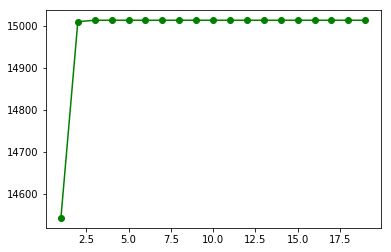

In [5]:
plt.plot(np.arange(1,max_iter),logL[1:max_iter],color='green', marker='o')
max(logL)


In [6]:
for j in np.arange(0,k):
    print(mu_hat[j])
    print(sigma_hat[j])
    print()
print()
for j in np.arange(0,k):
    print(mu[j])
    print(sigma[j])
    print()


[-0.0031319492398776618, 0.03402012385887402, 0.010421034159731802, -0.021359423017416234]
[[ 1.60352437  0.01179052  0.0043646  -0.01713279]
 [ 0.01179052  0.83632985 -0.00246765  0.0172803 ]
 [ 0.0043646  -0.00246765  0.12953017  0.0024518 ]
 [-0.01713279  0.0172803   0.0024518   0.21648666]]

[6.92627367358456, 7.021044205310901, 7.059803099836345, 6.9900543499466625]
[[ 2.71046951e+00 -3.92008850e-02 -1.28548971e-02 -1.29069943e-03]
 [-3.92008850e-02  2.32683137e+00 -5.64904296e-02  1.78299989e-02]
 [-1.28548971e-02 -5.64904296e-02  1.19968804e+00 -3.66668442e-02]
 [-1.29069943e-03  1.78299989e-02 -3.66668442e-02  2.09446898e-01]]

[3.053413442452285, 2.9661562818933445, 3.010894598028001, 3.1039106074071645]
[[ 2.07908945 -0.00637446 -0.04301156 -0.01800853]
 [-0.00637446  2.3370441  -0.04758678 -0.05044863]
 [-0.04301156 -0.04758678  0.95918311  0.03419909]
 [-0.01800853 -0.05044863  0.03419909  2.09017605]]


[0, 0, 0, 0]
[[1.608335   0.         0.         0.        ]
 [0.      